## Project Programming for Data Analytics 2018

**Problem Statement**

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

*Note students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.*

import matplotlib.pyplot as plt

In [1]:
import numpy as np

building a student dataset to look at vaiables that might influence progression as reported by HEA[1]

In [2]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt 

In [3]:
import pandas as pd

In [4]:
M_F =np.random.choice (['male', 'female'], 100, p =[0.48,0.52])
M_F

array(['female', 'male', 'female', 'male', 'female', 'female', 'male',
       'male', 'male', 'female', 'female', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'female',
       'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'male', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'female',
       'female', 'female', 'male', 'female', 'female', 'female', 'male',
       'female', 'female', 'male', 'female', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'male', 'male',
       '

In [5]:
full_part = np.random.choice (['full time', 'part time'], 100, p =[0.8,0.2])
full_part

array(['full time', 'full time', 'part time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'part time', 'full time',
       'full time', 'full time', 'part time', 'full time', 'part time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'part time', 'full time', 'part time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'part time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'part time', 'full time', 'full time', 'part time',
       'full time', 'full time', 'part time', 'full time', 'full time',
       'full time', 'full time', 'part time', 'part time', 'full time',
       'full time', 'full time', 'part time', 'full time', 'part

In [6]:
pref =[]
for i in range (1,101):
   # pref = (print(int(13**np.random.random())))
    p = (int(13**np.random.random()))
    pref.append(p)
    ## assume preference follows benfords law
print (pref)
print(i)


[9, 2, 1, 4, 3, 9, 8, 12, 3, 1, 1, 4, 3, 3, 2, 11, 1, 5, 5, 2, 2, 7, 1, 1, 2, 2, 1, 2, 1, 8, 2, 3, 4, 2, 2, 9, 3, 5, 5, 3, 4, 8, 2, 3, 6, 7, 1, 1, 9, 1, 1, 1, 1, 11, 4, 8, 7, 11, 1, 2, 1, 8, 9, 12, 3, 2, 12, 1, 9, 1, 3, 12, 3, 2, 2, 4, 10, 8, 1, 3, 3, 2, 4, 6, 9, 1, 1, 4, 4, 3, 5, 3, 11, 3, 8, 3, 1, 1, 5, 4]
100


In [7]:
cao = np.random.randint(250, 350, size=100)
cao
# cao pts

array([279, 291, 348, 340, 287, 262, 302, 279, 265, 304, 277, 260, 314,
       286, 342, 313, 340, 310, 261, 333, 272, 315, 283, 295, 342, 291,
       344, 276, 286, 324, 272, 251, 330, 259, 274, 304, 289, 255, 349,
       302, 294, 274, 336, 295, 294, 267, 331, 279, 336, 273, 348, 310,
       324, 302, 285, 260, 281, 295, 302, 326, 328, 251, 261, 283, 312,
       314, 260, 267, 276, 348, 311, 277, 292, 333, 341, 343, 257, 268,
       326, 303, 296, 336, 261, 263, 275, 347, 339, 342, 311, 313, 275,
       274, 251, 274, 283, 312, 251, 336, 274, 333])

In [8]:
df = pd.DataFrame ()
df ["full_part"] = full_part
df ["pref"] = pref
df ["CAO"] = cao
df ["Male_Female"] = M_F
#df ["list"] = (int(13**np.random.random()))

In [9]:
df

,full_part,pref,CAO,Male_Female
0,full time,9,279,female
1,full time,2,291,male
2,part time,1,348,female
3,full time,4,340,male
4,full time,3,287,female
5,full time,9,262,female
6,full time,8,302,male
7,full time,12,279,male
8,part time,3,265,male
9,full time,1,304,female


In [36]:
df.describe()
df.describe(include='all') 
df.groupby ("full_part").describe(include='all') 

##output to a csv!!

CAO                                                              \
          count unique top freq        mean        std    min    25%    50%   
full_part                                                                     
full time  77.0    NaN NaN  NaN  297.493506  29.364597  251.0  274.0  294.0   
part time  23.0    NaN NaN  NaN  300.347826  30.946594  251.0  274.5  295.0   

                  ...    pref                                              \
             75%  ...  unique top freq      mean       std  min  25%  50%   
full_part         ...                                                       
full time  326.0  ...     NaN NaN  NaN  4.428571  3.310385  1.0  2.0  3.0   
part time  320.0  ...     NaN NaN  NaN  3.869565  3.415265  1.0  1.0  3.0   

                      
           75%   max  
full_part             
full time  7.0  12.0  
part time  5.5  12.0  

[2 rows x 33 columns]

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


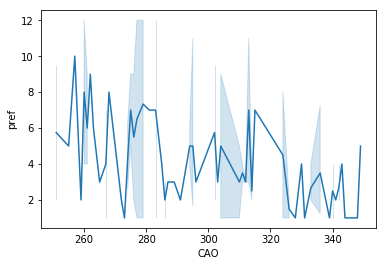

In [25]:
sns.lineplot (x = 'CAO', y = "pref", data = df)

## references

[HEA](http://hea.ie/)

https://en.wikipedia.org/wiki/Benford%27s_law

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html ##describe 